# Merge Two Binary Trees to create a new Binary Tree    
https://leetcode.com/problems/merge-two-binary-trees/

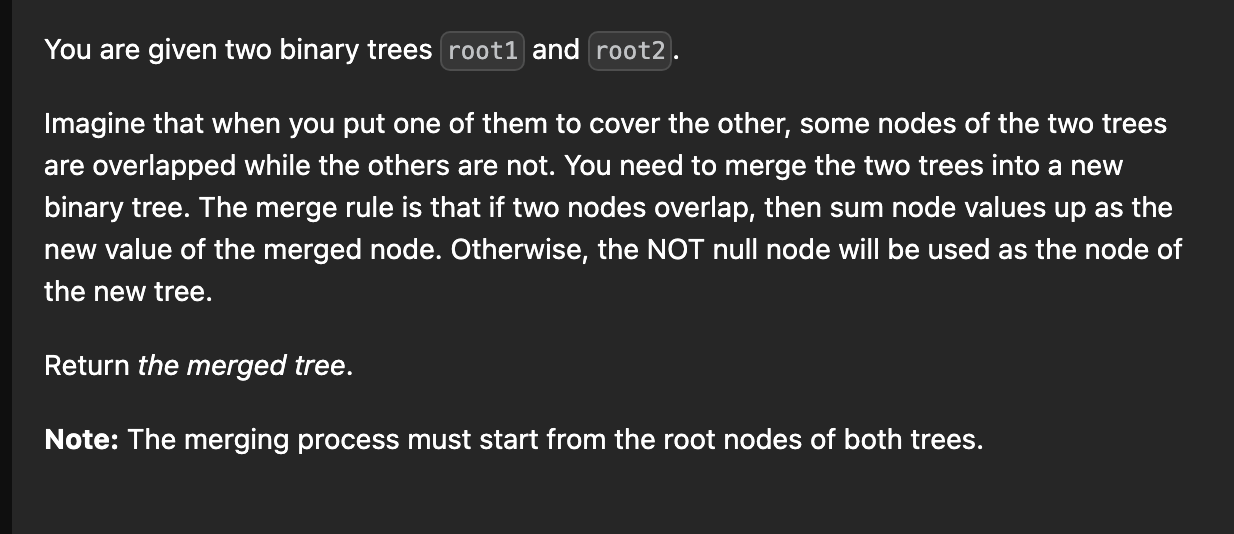

In [ ]:
class Solution {
public:
    TreeNode* mergeTrees(TreeNode* node1, TreeNode* node2) {
        if(!node1 and !node2) return nullptr;
        int val1 =  node1?node1->val:0;
        int val2 =  node2?node2->val:0;
        TreeNode* mergedNode=new TreeNode(val1+val2);
        mergedNode->left=mergeTrees(node1?node1->left:nullptr,node2?node2->left:nullptr);
        mergedNode->right=mergeTrees(node1?node1->right:nullptr,node2?node2->right:nullptr);
        return mergedNode;
    }
};

Binary Tree Pruning, every subtree containing no 1 is removed  
https://leetcode.com/problems/binary-tree-pruning/description/

In [ ]:
class Solution {
    public:
        //function which prunes as well as count number of 1s
        int countOnes(TreeNode* node){
            if(!node) return 0;
            if(!node->left and !node->right){
                if(node->val==1) return 1;
                return 0;
            }
    
            int lstOnes=countOnes(node->left),rstOnes=countOnes(node->right);
            //pruning
            if(lstOnes==0) node->left=nullptr;
            if(rstOnes==0) node->right=nullptr;
            //return number of 1s
            return lstOnes+rstOnes+ ((node->val)==1);
        }
                    
        TreeNode* pruneTree(TreeNode* root) {
            if(!root) return root;
            if(countOnes(root)==0) root=nullptr;
            return root;
        }
    };

https://leetcode.com/problems/delete-nodes-and-return-forest/description/

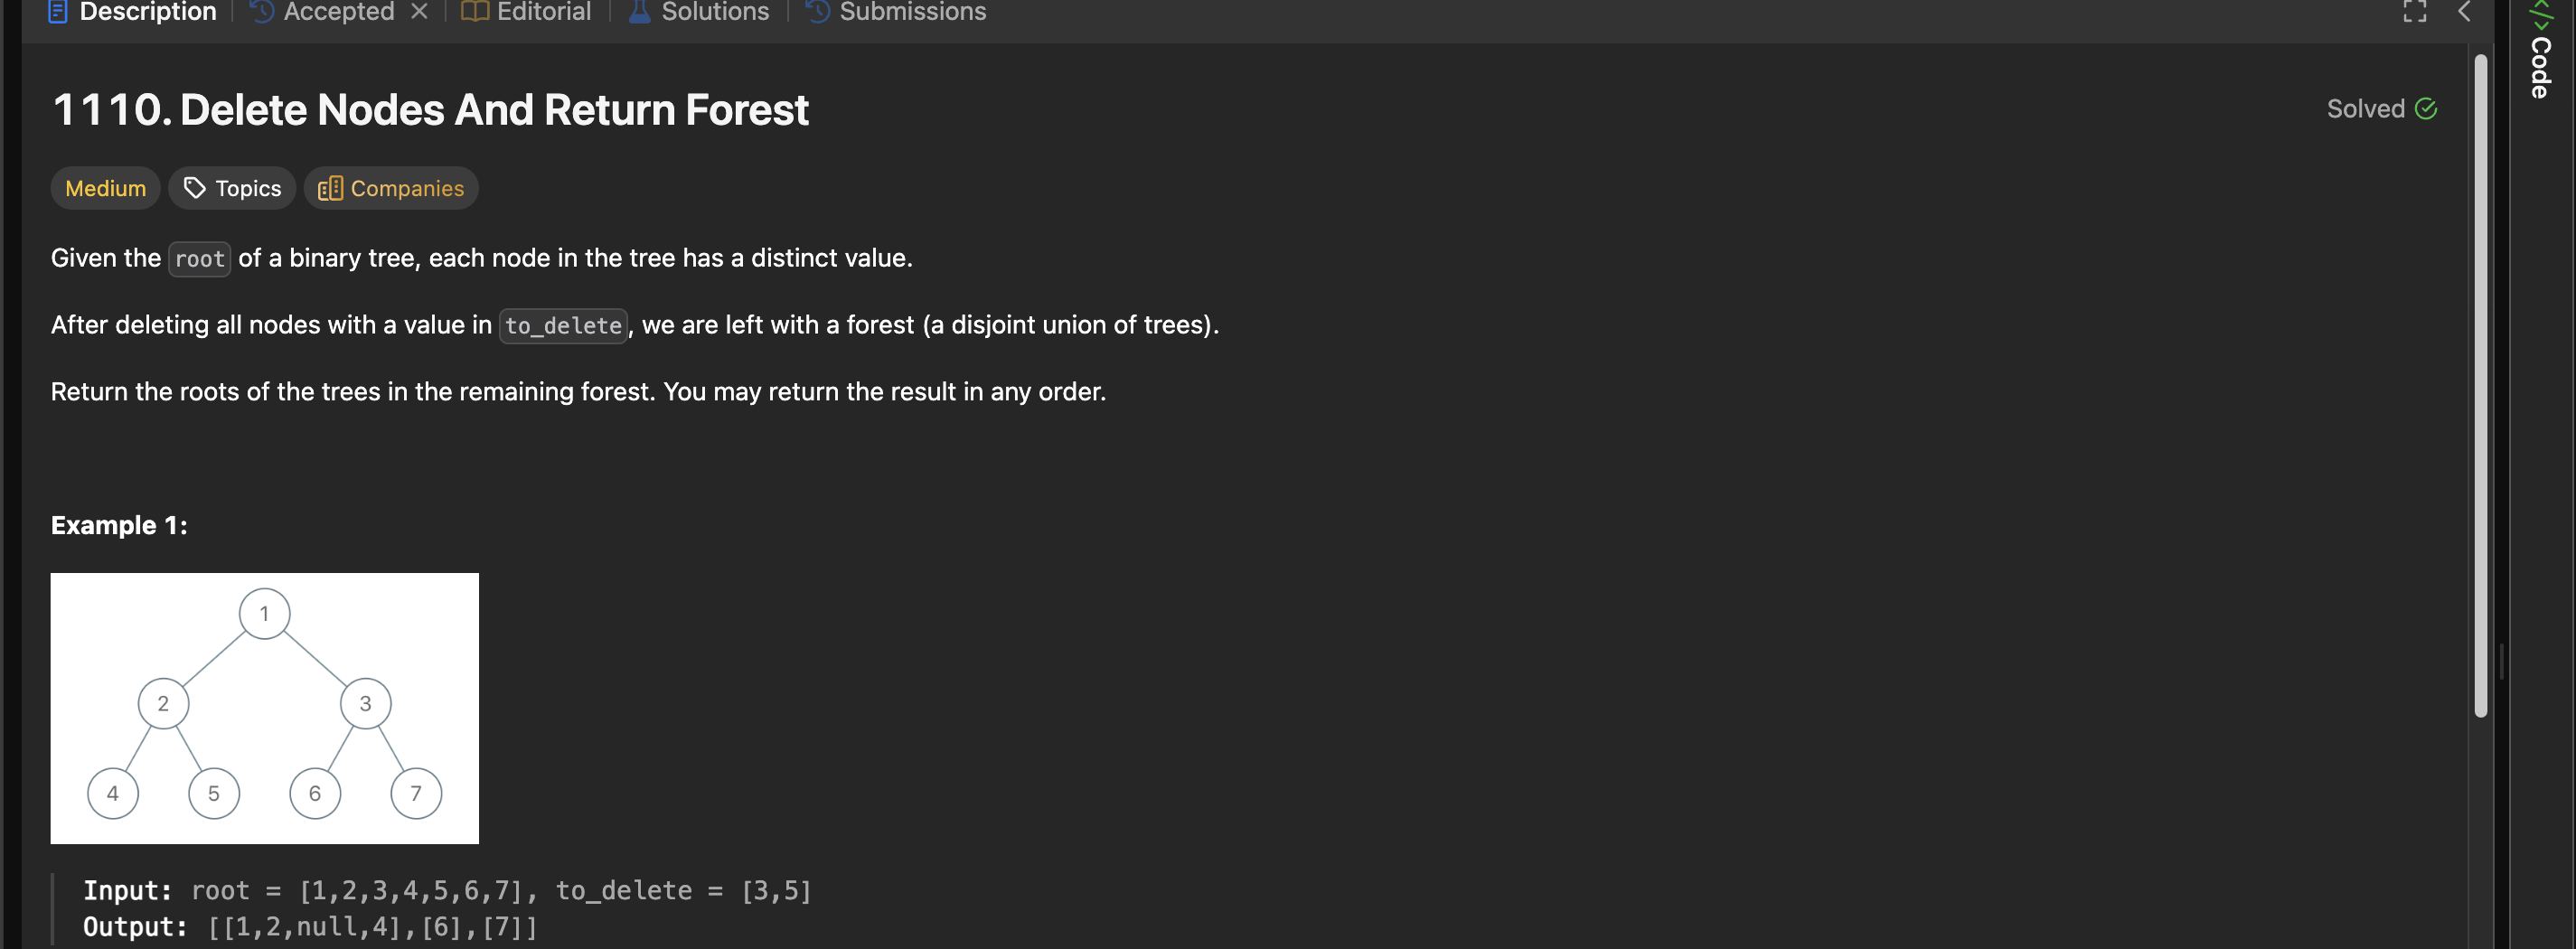

In [ ]:
class Solution {
    public:
        void t(TreeNode* node, unordered_set<int> &se, vector<TreeNode*> &ans, TreeNode* par){
            if(!node) return;
            t(node->left, se, ans,node);
            t(node->right, se, ans,node);
            if(se.count(node->val)){
                if(node->left){
                    ans.push_back(node->left);
                }
                if(node->right){
                    ans.push_back(node->right);
                }
                if(par and par->left==node){
                    par->left=nullptr;
                    delete(node);
                }
                if(par and par->right==node){
                    par->right=nullptr;
                    delete(node); 
                }
    
            }
        }
    
        vector<TreeNode*> delNodes(TreeNode* root, vector<int>& v) {
            vector<TreeNode*> ans;
            unordered_set<int> se(v.begin(),v.end());
            TreeNode* par=nullptr;
            t(root, se, ans,par);
            if(!se.count(root->val)){
                ans.push_back(root);
            }
            else{
                delete(root);
            }
            return ans;
        }
    };

https://leetcode.com/problems/find-leaves-of-binary-tree/description/

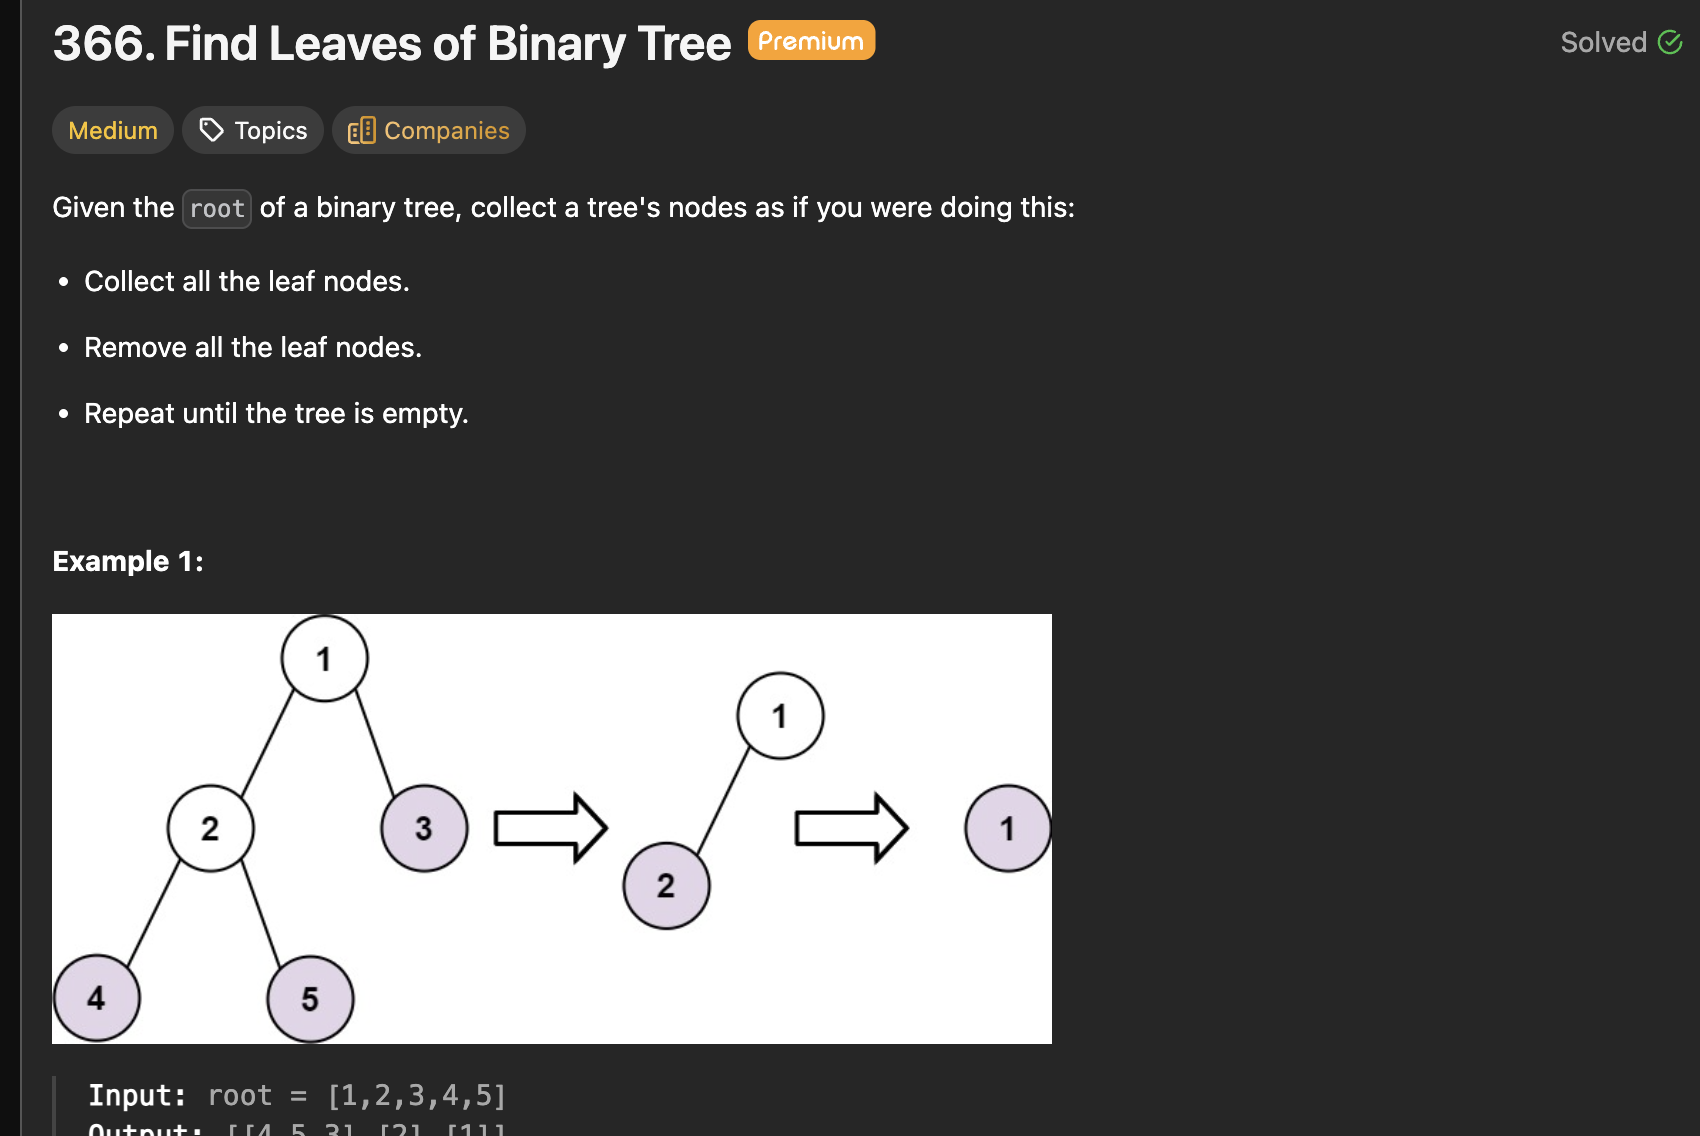

this is wrong

In [ ]:
class Solution {
    public:
        bool isLeaf(TreeNode* node){
            return !node->left and !node->right;
        }
    
        void t(TreeNode* node, TreeNode* par, vector<int> &tmp){
            if(!node) return;
            t(node->left, node, tmp);
            t(node->right, node, tmp);
            if(isLeaf(node)){
                if(par and par->left==node){
                    par->left=nullptr;
                    tmp.push_back(node->val);
                    delete(node);
                }
                if(par and par->right==node){
                    par->right=nullptr;
                    tmp.push_back(node->val);
                    delete(node); 
                }
            }
    
        }
    
        vector<vector<int>> findLeaves(TreeNode* root) {
            vector<vector<int>> ans;
            while(!isLeaf(root)){
                vector<int> tmp;
                TreeNode* par=nullptr;
                t(root,par,tmp);
                ans.push_back(tmp);
            }
            ans.push_back({root->val});
            return ans;
        }
    };

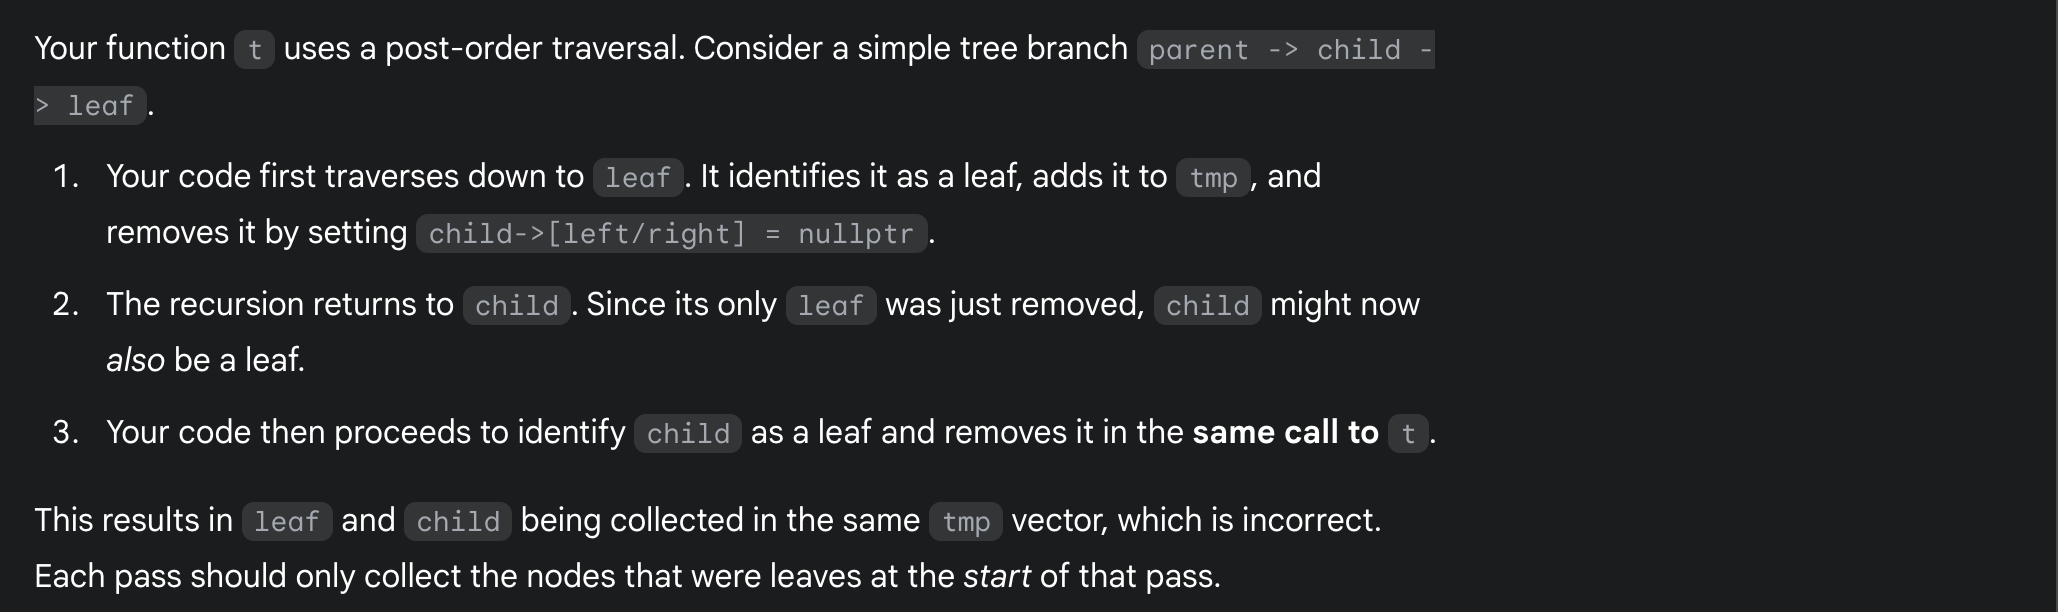

In [ ]:
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
    public:
        bool isLeaf(TreeNode* node){
            return !node->left and !node->right;
        }
    
        void t(TreeNode* node, TreeNode* par, vector<int> &tmp){
            if(!node) return;
            if(isLeaf(node)){
                if(par and par->left==node){
                    par->left=nullptr;
                    tmp.push_back(node->val);
                    // delete(node);
                }
                if(par and par->right==node){
                    par->right=nullptr;
                    tmp.push_back(node->val);
                    // delete(node); 
                }
            }
            t(node->left, node, tmp);
            t(node->right, node, tmp);
        }
    
        vector<vector<int>> findLeaves(TreeNode* root) {
            vector<vector<int>> ans;
            while(!isLeaf(root)){
                vector<int> tmp;
                TreeNode* par=nullptr;
                t(root,par,tmp);
                ans.push_back(tmp);
            }
            ans.push_back({root->val});
            return ans;
        }
    };